<a href="https://colab.research.google.com/github/omidkhalafbeigi/rnn_from_scratch/blob/main/RNN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from matplotlib import pyplot as plt

In [50]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [136]:
data = list()
x = list()

for i in range(-720, 720):
  rad = (i * math.pi) / 180
  x.append(rad)
  data.append(math.sin(rad))

x = np.array(x)
data = np.array(data)

timesteps = 2
X_train = list()
y_train = list()

for i in range(timesteps, data.shape[0], 1):
  X_train.append(data[i - timesteps:i])
  y_train.append(data[i])

X_train = MinMaxScaler().fit_transform(np.array(X_train))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train).reshape(-1, 1)

In [ ]:
w1_prev = np.random.rand(1, 1)
w2_prev = np.random.rand(1, 1)
w1 = np.random.rand(1, 1)
w2 = np.random.rand(1, 1)
w3 = np.random.rand(1, 1)
w4 = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)
b2 = np.random.rand(1, 1)
c = np.random.rand(1, 1)
lr = 0.001

for epoch in range(3000):
  for index in range(X_train.shape[0]):
    sample = X_train[index]
    h1_prev = sigmoid((sample[0] * w1) + b1)
    h1 = sigmoid((sample[1] * w1) + (h1_prev * w1_prev) + b1)
    h2_prev = sigmoid((sample[0] * w2) + b2)
    h2 = sigmoid((sample[1] * w2) + (h2_prev * w2_prev) + b2)

    o = (h1 * w3) + (h2 * w4) + c
    error = y_train[index] - o

    e = (sample[0] * w1) + (h1_prev * w1_prev) + b1
    z = (sample[1] * w1) + (sigmoid(e) * w1_prev) + b1
    b1 -= lr * (-2) * error * sigmoid_der(z) * (1 + (w1_prev * sigmoid_der(e)))
    w1 -= lr * (-2) * error * w3 * sigmoid_der(z) * (sample[1] + (sample[0] * w1_prev * sigmoid_der(e)))
    w1_prev -= lr * (-2) * error * sigmoid_der(z) * (sigmoid((sample[0] * w1) + (h1_prev * w1_prev) + b1) + h1_prev * sigmoid_der(e) * w1_prev)
    w3 -= lr * (-2) * error * h1

    e = (sample[0] * w2) + (h2_prev * w2_prev) + b2
    z = (sample[1] * w2) + (sigmoid(e) * w2_prev) + b2
    b2 -= lr * (-2) * error * sigmoid_der(z) * (1 + (w2_prev * sigmoid_der(e)))
    w2 -= lr * (-2) * error * w4 * sigmoid_der(z) * (sample[1] + (sample[0] * w2_prev * sigmoid_der(e)))
    w2_prev -= lr * (-2) * error * sigmoid_der(z) * (sigmoid((sample[0] * w2) + (h2_prev * w2_prev) + b2) + h2_prev * sigmoid_der(e) * w2_prev)
    w4 -= lr * (-2) * error * h2

    c -= lr * (-2) * error

  print(f'Error: {error} - Epoch: {epoch}')


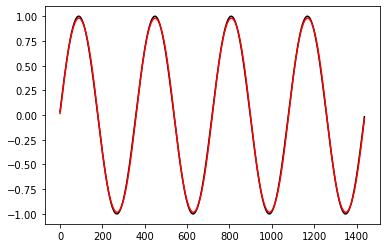

In [142]:
outputs = list()
for index in range(X_train.shape[0]):
    sample = X_train[index]
    h1_prev = sigmoid((sample[0] * w1) + b1)
    h1 = sigmoid((sample[1] * w1) + (h1_prev * w1_prev) + b1)
    h2_prev = sigmoid((sample[0] * w2) + b2)
    h2 = sigmoid((sample[1] * w2) + (h2_prev * w2_prev) + b2)

    o = (h1 * w3) + (h2 * w4) + c
    outputs.append(o)

outputs = np.array(outputs)
outputs = np.reshape(outputs, (outputs.shape[0],))
plt.plot(y_train, 'black')
plt.plot(outputs, 'red')
plt.show()